In [1]:
import tensorflow as tf
# from tensorboard.plugins.hparams import api as hp
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
ratings = pd.read_pickle("./Data/reviews_20_1000_longform.pkl")

In [6]:
ratings.shape

(8854093, 3)

In [7]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings['user_id'].values)
n_users = ratings['user'].nunique()

item_enc = LabelEncoder()
ratings['movie'] = item_enc.fit_transform(ratings['movie_id'].values)
n_movies = ratings['movie'].nunique()

nmovie_id = ratings.movie_id.nunique()
nuser_id = ratings.user_id.nunique()

n_users, n_movies

(64815, 89418)

In [8]:
X_train, X_test = train_test_split(ratings[['movie', 'user', 'rating_score']], test_size=0.3, random_state=42)

In [9]:
X_train.shape, X_test.shape

((6197865, 3), (2656228, 3))

In [11]:
def train_test_model(output_bias):
    
    input_movies = keras.layers.Input(shape=[1])
    embed_movies = keras.layers.Embedding(nmovie_id+1, 15)(input_movies)
    movies_out = keras.layers.Flatten()(embed_movies)

    input_users = keras.layers.Input(shape=[1])
    embed_users = keras.layers.Embedding(nuser_id+1, 15)(input_users)
    users_out = keras.layers.Flatten()(embed_users)

    bias1 = keras.initializers.Constant(output_bias[0])
    bias2 = keras.initializers.Constant(output_bias[1])
    
    conc_layer = keras.layers.Concatenate()([movies_out, users_out])
    
    dense1 = keras.layers.Dense(128,activation='relu', kernel_regularizer='l2')(conc_layer)
    
    dropout1 = keras.layers.Dropout(rate=.6, seed=42)(dense1)
    
    dense2 = keras.layers.Dense(64,activation='relu', kernel_regularizer='l2')(dropout1)
    
    dropout2 = keras.layers.Dropout(rate=.5, seed=42)(dense2)
    
    dense3 = keras.layers.Dense(32, activation='relu', kernel_regularizer='l2')(dropout2)
    
    dropout3 = keras.layers.Dropout(rate=.4, seed=42)(dense3)
    
    dense4 = keras.layers.Dense(16, activation='relu', kernel_regularizer='l2')(dropout3)
    
    x_out1 = keras.layers.Dense(1, activation='relu', kernel_regularizer='l2', bias_initializer=bias1)(dense3)
    x_out2 = keras.layers.Dense(1, activation='relu', kernel_regularizer='l2', bias_initializer=bias2)(x_out1)

    model = keras.Model([input_movies, input_users], x_out2)
    
    opt = tf.optimizers.Adam(learning_rate=.01)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics = keras.metrics.RootMeanSquaredError())


#     print(hist.history['val_mean_squared_error'])
    return model

In [11]:
# callback = keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
#                                         min_delta=.001,
#                                         patience=30,
#                                         mode="auto",
#                                         restore_best_weights=True)

In [12]:
model = train_test_model(output_bias=[1,6])

In [13]:
output = model.fit([X_train.movie, X_train.user], 
             X_train.rating_score,  
             batch_size=len(X_train), epochs=100, validation_split=.2,
#                   callbacks=[callback]
                  )

Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 7.0468 - root_mean_squared_error: 2.2955 - val_loss: 6.6157 - val_root_mean_squared_error: 2.2558
Epoch 2/100
1/1 [==============================] - 10s 10s/step - loss: 6.6222 - root_mean_squared_error: 2.2573 - val_loss: 6.2147 - val_root_mean_squared_error: 2.2158
Epoch 3/100
1/1 [==============================] - 12s 12s/step - loss: 6.2244 - root_mean_squared_error: 2.2180 - val_loss: 5.8038 - val_root_mean_squared_error: 2.1663
Epoch 4/100
1/1 [==============================] - 9s 9s/step - loss: 5.8159 - root_mean_squared_error: 2.1691 - val_loss: 5.3656 - val_root_mean_squared_error: 2.1025
Epoch 5/100
1/1 [==============================] - 9s 9s/step - loss: 5.3783 - root_mean_squared_error: 2.1055 - val_loss: 4.8736 - val_root_mean_squared_error: 2.0170
Epoch 6/100
1/1 [==============================] - 9s 9s/step - loss: 4.8856 - root_mean_squared_error: 2.0200 - val_loss: 4.2939 - val_root_mean_squared_

1/1 [==============================] - 9s 9s/step - loss: 0.9446 - root_mean_squared_error: 0.9015 - val_loss: 0.8713 - val_root_mean_squared_error: 0.8604
Epoch 50/100
1/1 [==============================] - 9s 9s/step - loss: 0.9377 - root_mean_squared_error: 0.8981 - val_loss: 0.8621 - val_root_mean_squared_error: 0.8554
Epoch 51/100
1/1 [==============================] - 9s 9s/step - loss: 0.9306 - root_mean_squared_error: 0.8945 - val_loss: 0.8554 - val_root_mean_squared_error: 0.8516
Epoch 52/100
1/1 [==============================] - 9s 9s/step - loss: 0.9264 - root_mean_squared_error: 0.8923 - val_loss: 0.8518 - val_root_mean_squared_error: 0.8497
Epoch 53/100
1/1 [==============================] - 9s 9s/step - loss: 0.9254 - root_mean_squared_error: 0.8920 - val_loss: 0.8499 - val_root_mean_squared_error: 0.8490
Epoch 54/100
1/1 [==============================] - 9s 9s/step - loss: 0.9247 - root_mean_squared_error: 0.8920 - val_loss: 0.8482 - val_root_mean_squared_error: 0.8486

1/1 [==============================] - 9s 9s/step - loss: 0.8475 - root_mean_squared_error: 0.8682 - val_loss: 0.8064 - val_root_mean_squared_error: 0.8444
Epoch 98/100
1/1 [==============================] - 9s 9s/step - loss: 0.8464 - root_mean_squared_error: 0.8677 - val_loss: 0.8055 - val_root_mean_squared_error: 0.8440
Epoch 99/100
1/1 [==============================] - 9s 9s/step - loss: 0.8455 - root_mean_squared_error: 0.8674 - val_loss: 0.8047 - val_root_mean_squared_error: 0.8437
Epoch 100/100
1/1 [==============================] - 9s 9s/step - loss: 0.8442 - root_mean_squared_error: 0.8668 - val_loss: 0.8040 - val_root_mean_squared_error: 0.8435


In [14]:
callback.best

0.841437578201294

In [121]:
callback.monitor

'val_root_mean_squared_error'

In [122]:
callback.model

In [ ]:
output2 = model.fit([X_train.movie, X_train.user], 
             X_train.rating_score,  
             batch_size=len(X_train), epochs=10, validation_split=.2,
                  callbacks=[callback])

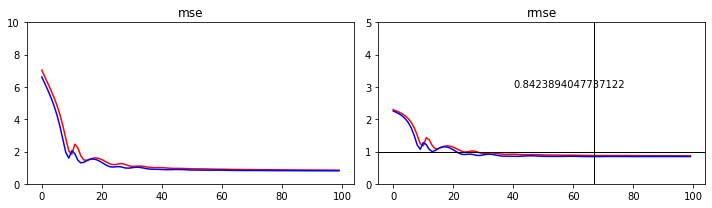

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))


axs[0].plot(output.history['loss'], color='r')
axs[0].plot(output.history['val_loss'], color='b')

axs[1].plot(output.history['root_mean_squared_error'], color='r')
axs[1].plot(output.history['val_root_mean_squared_error'], color='b')
axs[1].axvline(np.where(output.history['val_root_mean_squared_error']==np.min(output.history['val_root_mean_squared_error'])), 
                 color='k', lw=1)
axs[1].annotate(str(np.min(output.history['val_root_mean_squared_error'])),
                    xy=(40,3),)

#     title_str = '-'.join(str(run_history[key]['params'][param]) for param in run_history[key]['params'].keys(),
#                         xytext=(.8,.8), xycoords='subfigure fraction')

axs[0].set_title("mse")
axs[1].set_title("rmse")

axs[0].set_ylim(0,10)
axs[1].set_ylim(0,5)

axs[1].axhline(1, color='k', lw=1)
    
plt.tight_layout()   
plt.show()

In [90]:
len(output.history['loss'])

100

In [91]:
model.trainable_variables

[<tf.Variable 'embedding_14/embeddings:0' shape=(89419, 15) dtype=float32, numpy=
 array([[-0.04060972, -0.0408831 , -0.07540319, ...,  0.05272159,
         -0.01610826,  0.03636319],
        [-0.07631765,  0.01794105, -0.00635751, ..., -0.0513144 ,
         -0.06476335, -0.01258612],
        [-0.02940135, -0.03517935, -0.00887026, ...,  0.12255664,
          0.15908323,  0.02870064],
        ...,
        [ 0.02127912,  0.04027199,  0.00054735, ..., -0.1885152 ,
         -0.03283613, -0.06176513],
        [ 0.01619839,  0.04960533,  0.02113556, ...,  0.09155231,
          0.01556375,  0.04586617],
        [ 0.01719183,  0.03272376, -0.01236945, ...,  0.01487299,
         -0.04141879,  0.04155825]], dtype=float32)>,
 <tf.Variable 'embedding_15/embeddings:0' shape=(64816, 15) dtype=float32, numpy=
 array([[-0.07097471, -0.10677434, -0.12696075, ..., -0.08312505,
         -0.07205073, -0.0492179 ],
        [ 0.0753029 , -0.00496834, -0.00133236, ...,  0.05152988,
          0.0306449 , -0.

In [26]:
model.save('saved_model/copy19/model.h5')

In [92]:
!mkdir -p saved_model
model.save('saved_model/rmse_845')

INFO:tensorflow:Assets written to: saved_model/rmse_845/assets


In [93]:
model.save('saved_model/rmse_845/model.h5')

In [94]:
X_train.groupby('rating_score').count()

,movie,user
rating_score,,
1,223618,223618
2,562898,562898
3,1558336,1558336
4,2254707,2254707
5,1598298,1598298


In [15]:
import random
from itertools import chain
def flatten(list_of_lists):
    "Flatten one level of nesting"
    return chain.from_iterable(list_of_lists)

In [17]:
X_train

,movie,user,rating_score
11862877,91,8097,4
6424992,12048,44363,3
12709205,176,21194,4
8348272,28179,7508,3
5786658,9053,3915,3
...,...,...,...
13103465,212,52317,4
3382914,3297,11310,5
7663495,20601,24438,4
12216666,136,24176,4


In [18]:
X_train.groupby('user').count().sort_values(by='movie',ascending=False).head()

,movie,rating_score
user,,
49758,735,735
46967,734,734
14547,722,722
40854,719,719
20490,718,718


In [16]:
user = 58315
ratings[ratings.user==user]

,movie_id,rating_score,user_id,user,movie
13381,1085,4,89904558,58315,1038
19800,1094,4,89904558,58315,1047
23850,1099,2,89904558,58315,1052
35843,1103,5,89904558,58315,1056
48584,1116,3,89904558,58315,1069
...,...,...,...,...,...
15428890,981,2,89904558,58315,941
15489675,1046,3,89904558,58315,1002
15493413,1047,2,89904558,58315,1003
15498925,1049,2,89904558,58315,1005


In [17]:
movie_array = ratings[ratings.user==user].movie.values.astype(int)
user_array = np.array([int(user) for n in range(len(movie_array))])

In [18]:
pred = model.predict([movie_array, user_array])

In [19]:
def is_close_enough(pred, ratings):
    val = []
    for pair in zip(pred, ratings):
        if pair[1] == 5:
            val.append(pair[1] - 1 <= pair[0])
        else:
            val.append(pair[1] - .5 <= pair[0] <= pair[1] + .5)
        
    return val

In [20]:
val = is_close_enough(np.round(pred.flatten(), 1), ratings[ratings.user==user].rating_score.values)

In [21]:
sum(val) / len(pred.flatten())

0.5450901803607214

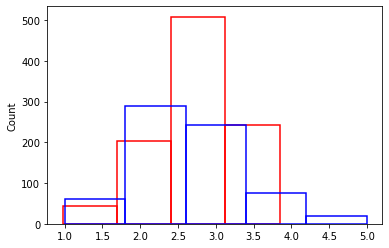

In [22]:
sns.histplot(pred.flatten(), bins=4, color='red', fill=False)
sns.histplot(X_train[X_train.user==user].rating_score.values, bins=5, color='blue', fill=False)

plt.show()

In [23]:
top_20_users = X_train.groupby('user').count().sort_values(by='movie',ascending=False).head(20).index

In [24]:
predictions = []

for user in top_20_users:
    movie_array = X_train[X_train.user==user].movie.values.astype(int)
    user_array = np.array([int(user) for n in range(len(movie_array))])
    pred = model.predict([movie_array, user_array])
    val = is_close_enough(np.round(pred.flatten(), 1), ratings[ratings.user==user].rating_score.values)
    
    predictions.append(list(pred.flatten()))
    print(user, sum(val) / len(pred.flatten()))

49758 0.39727891156462586
46967 0.3869209809264305
14547 0.3864265927977839
40854 0.4339360222531293
20490 0.31197771587743733
13686 0.42677824267782427
18058 0.3389121338912134
28524 0.44195804195804195
38238 0.398876404494382
13828 0.3651685393258427
41054 0.4177215189873418
1380 0.38928067700987307
55147 0.3248587570621469
10210 0.4016973125884017
5321 0.39038189533239037
14125 0.4631728045325779
6497 0.3526912181303116
17796 0.41076487252124644
59336 0.42411347517730497
2488 0.5511363636363636


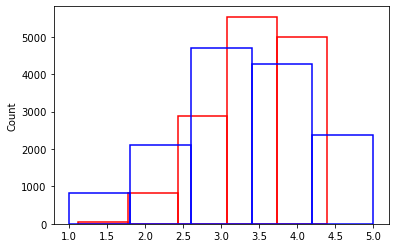

In [25]:
sns.histplot(list(flatten(predictions)), bins=5, color='red', fill=False)
sns.histplot(X_train[X_train.user.isin(top_20_users)].rating_score.values, bins=5, color='blue', fill=False)

plt.show()